<a href="https://colab.research.google.com/github/Rakin7/Pytorch/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.9
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         

In [4]:
import torch
import numpy as np
my_list=[[1,2,3,4],[5,6,7,8]]
print(my_list)

np1=np.random.rand(3,4)
print(np1)
np1.dtype

tensor_2d=torch.randn(3,4)
tensor_2d

tensor_3d=torch.zeros(2,3,4)
tensor_3d

[[1, 2, 3, 4], [5, 6, 7, 8]]
[[0.46858308 0.3771633  0.28044426 0.74100817]
 [0.3320891  0.07838643 0.48415397 0.86410487]
 [0.9199986  0.72375933 0.28423834 0.48063912]]


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [5]:
my_tensor=torch.tensor(np1)
my_tensor

tensor([[0.4686, 0.3772, 0.2804, 0.7410],
        [0.3321, 0.0784, 0.4842, 0.8641],
        [0.9200, 0.7238, 0.2842, 0.4806]], dtype=torch.float64)

In [6]:
import torch
import numpy as np
my_list=[[1,2,3,4],[5,6,7,8]]
print(my_list)

np1=np.random.rand(3,4)
print(np1)
np1.dtype

tensor_2d=torch.randn(3,4)
tensor_2d

tensor_3d=torch.zeros(2,3,4)
tensor_3d
tensor_3d.dtype

[[1, 2, 3, 4], [5, 6, 7, 8]]
[[0.85919535 0.14417618 0.69812481 0.78267566]
 [0.37939943 0.13365069 0.89769183 0.65928234]
 [0.01618327 0.74889671 0.21266128 0.25868578]]


torch.float32

In [7]:
my_tensor=torch.tensor(np1)
my_tensor

tensor([[0.8592, 0.1442, 0.6981, 0.7827],
        [0.3794, 0.1337, 0.8977, 0.6593],
        [0.0162, 0.7489, 0.2127, 0.2587]], dtype=torch.float64)

In [8]:
mytorch=torch.arange(10)
mytorch
my_torch=mytorch.reshape(2,5)
my_torch
my_torch2=mytorch.reshape(2,-1)#if we do not know the size
my_torch2
mytorch3=torch.arange(15)
mytorch3
mytorch4=mytorch3.view(3,5)
mytorch4
mytorch7=torch.arange(10)
mytorch7
mytorch7[7]
mytorch8=mytorch7.reshape(5,2)
mytorch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

Neural Network

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Create a Model Class
class Model(nn.Module):

  # Input layer = 4 feature
  # two hidden layers
  #Output layer = 3
  def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
    super().__init__() #instantiate our nn.Module
    self.fc1=nn.Linear(in_features,h1) #fully connected
    self.fc2=nn.Linear(h1,h2) #fully connected
    self.out=nn.Linear(h2,out_feature) #output layer

  #move everything forward
  def forward(self,x):
    x = f.relu(self.fc1(x)) #rectify linear unit function
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x

In [10]:
#Pick a random seed for randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [11]:
#Loading data and changing column
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df['variety']=my_df['variety'].replace('Setosa', 0.0)
my_df['variety']=my_df['variety'].replace('Versicolor', 1.0)
my_df['variety']=my_df['variety'].replace('Virginica', 2.0)

<ipython-input-11-7f39104287ee>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica', 2.0)


In [12]:
# Train and Test
X = my_df.drop('variety', axis=1)
y = my_df['variety']
#Convert to numpy array
X = X.values
y = y.values

In [13]:
from sklearn.model_selection import train_test_split
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
#features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#Measure error
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [15]:
#Train our model
epochs = 150
losses = []
for i in range(epochs):
  # Go forward and predict
  y_pred = model.forward(X_train)
  #Measure the loss
  loss = criterion(y_pred, y_train)
  #Track of losses
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f"Epoch {i} and loss:{loss}")
  #Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss:1.125203251838684
Epoch 10 and loss:0.4708411395549774
Epoch 20 and loss:0.13049420714378357
Epoch 30 and loss:0.0723516047000885
Epoch 40 and loss:0.04318682849407196
Epoch 50 and loss:0.030768733471632004
Epoch 60 and loss:0.023274028673768044
Epoch 70 and loss:0.021722428500652313
Epoch 80 and loss:0.020942913368344307
Epoch 90 and loss:0.019797788932919502
Epoch 100 and loss:0.016423599794507027
Epoch 110 and loss:0.014903499744832516
Epoch 120 and loss:0.03001626394689083
Epoch 130 and loss:0.013691859319806099
Epoch 140 and loss:0.012751187197864056


Text(0.5, 0, 'Epoch')

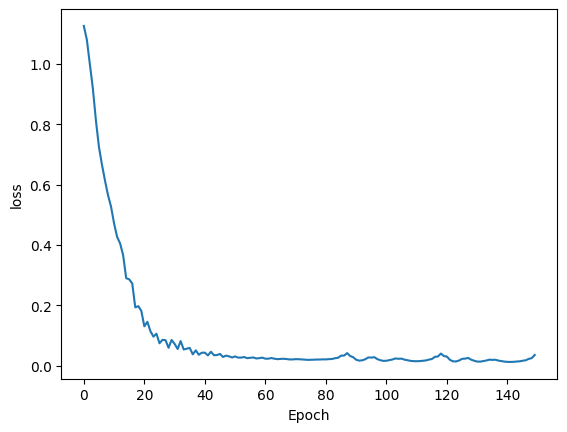

In [16]:
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel("Epoch")

In [21]:
#Evaluate model
with torch.no_grad(): #stop back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f"{i+1}.) {y_test[i]} \t {y_val.argmax().item()}") #iris type
    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f"We got {correct} correct ")

1.) 2 	 2
2.) 2 	 2
3.) 2 	 2
4.) 1 	 1
5.) 2 	 2
6.) 1 	 1
7.) 2 	 2
8.) 1 	 1
9.) 2 	 2
10.) 2 	 2
11.) 2 	 1
12.) 0 	 0
13.) 0 	 0
14.) 1 	 1
15.) 0 	 0
16.) 2 	 1
17.) 0 	 0
18.) 1 	 2
19.) 0 	 0
20.) 0 	 0
21.) 1 	 1
22.) 2 	 2
23.) 0 	 0
24.) 0 	 0
25.) 1 	 1
26.) 1 	 1
27.) 1 	 1
28.) 1 	 1
29.) 0 	 0
30.) 1 	 1
We got 27 correct 
